In [2]:
import pandas as pd
import numpy as np

In [4]:
id_df = pd.read_csv("train_identity.csv")
trans_df = pd.read_csv("train_transaction.csv")

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
df_train = pd.merge(id_df, trans_df, on="TransactionID", how="left")

In [133]:
df_train.shape

(144233, 434)

In [134]:
len(df_train[df_train["isFraud"]==1])/len(df_train)

0.07847025299342036

In [135]:
from sklearn.model_selection import train_test_split

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

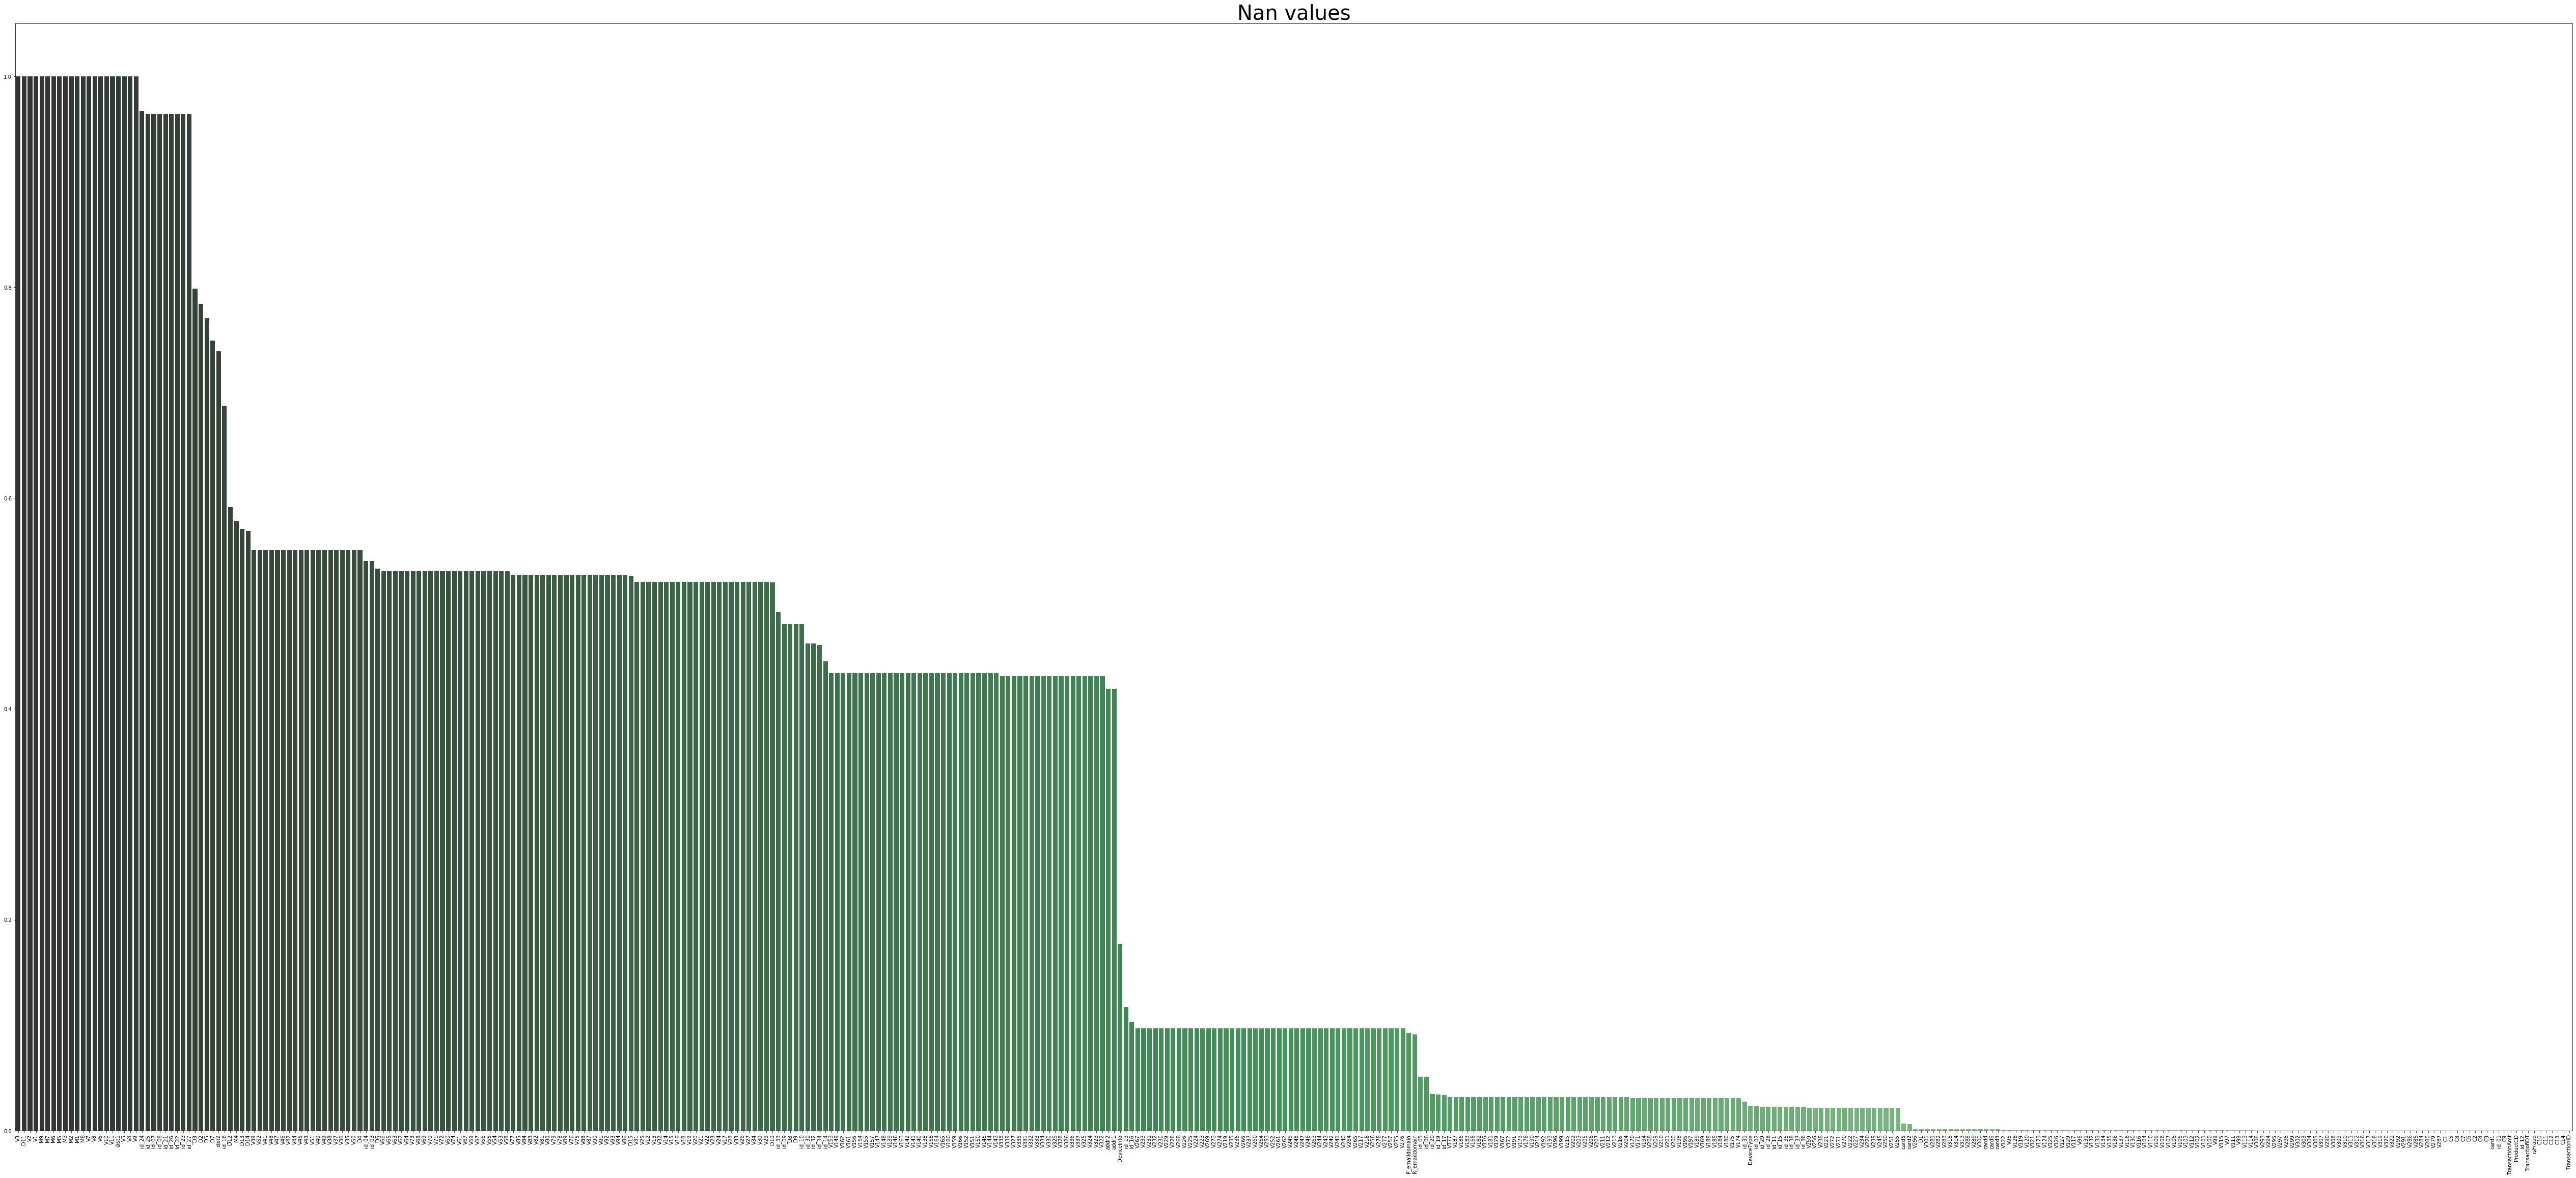

In [137]:
plt.figure(figsize=(90,40))
sns.barplot(y=df_train.isnull().sum().sort_values(ascending=False)/len(df_train),
       x=df_train.isnull().sum().sort_values(ascending=False).index,
       palette='Greens_d')
plt.title("Nan values", size=40)
plt.xticks(rotation=90)

In [116]:
df_train[df_train.select_dtypes(include=['object']).columns]

,id_12,id_15,id_16,id_23,id_27,id_28,id_29,id_30,id_31,id_33,...,id_37,id_38,DeviceType,DeviceInfo,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M4
0,NotFound,New,NotFound,-999999,-999999,New,NotFound,Android 7.0,samsung browser 6.2,2220x1080,...,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M,H,mastercard,credit,gmail.com,-999999,-999999
1,NotFound,New,NotFound,-999999,-999999,New,NotFound,iOS 11.1.2,mobile safari 11.0,1334x750,...,F,T,mobile,iOS Device,H,visa,debit,anonymous.com,-999999,-999999
2,NotFound,Found,Found,-999999,-999999,Found,Found,-999999,chrome 62.0,-999999,...,T,T,desktop,Windows,C,mastercard,credit,gmail.com,gmail.com,M0
3,NotFound,New,NotFound,-999999,-999999,New,NotFound,-999999,chrome 62.0,-999999,...,T,T,desktop,-999999,C,mastercard,debit,hotmail.com,hotmail.com,M0
4,NotFound,Found,Found,-999999,-999999,Found,Found,Mac OS X 10_11_6,chrome 62.0,1280x800,...,T,T,desktop,MacOS,H,visa,debit,aol.com,-999999,-999999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,NotFound,Found,Found,-999999,-999999,Found,Found,-999999,chrome 66.0 for android,-999999,...,T,F,mobile,F3111 Build/33.3.A.1.97,C,mastercard,debit,yahoo.fr,yahoo.fr,M2
144229,NotFound,New,NotFound,-999999,-999999,New,NotFound,Android 7.1.1,chrome 55.0 for android,855x480,...,T,F,mobile,A574BL Build/NMF26F,R,visa,credit,gmail.com,gmail.com,-999999
144230,NotFound,New,NotFound,-999999,-999999,New,NotFound,-999999,chrome 65.0 for android,-999999,...,T,F,mobile,Moto E (4) Plus Build/NMA26.42-152,C,mastercard,credit,gmail.com,gmail.com,M2
144231,NotFound,Found,Found,-999999,-999999,Found,Found,Mac OS X 10_9_5,chrome 66.0,2560x1600,...,T,F,desktop,MacOS,R,visa,credit,gmail.com,anonymous.com,-999999


In [117]:
df_train = pd.get_dummies(data=df_train, columns=['id_12', 'id_15', 'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9'])

In [118]:
df_train[df_train.select_dtypes(include=['object']).columns]

,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,ProductCD,card4,card6,P_emaildomain
0,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M,H,mastercard,credit,gmail.com
1,match_status:1,T,F,F,T,mobile,iOS Device,H,visa,debit,anonymous.com
2,-999999,F,F,T,T,desktop,Windows,C,mastercard,credit,gmail.com
3,-999999,F,F,T,T,desktop,-999999,C,mastercard,debit,hotmail.com
4,match_status:2,T,F,T,T,desktop,MacOS,H,visa,debit,aol.com
...,...,...,...,...,...,...,...,...,...,...,...
144228,-999999,F,F,T,F,mobile,F3111 Build/33.3.A.1.97,C,mastercard,debit,yahoo.fr
144229,match_status:2,T,F,T,F,mobile,A574BL Build/NMF26F,R,visa,credit,gmail.com
144230,-999999,F,F,T,F,mobile,Moto E (4) Plus Build/NMA26.42-152,C,mastercard,credit,gmail.com
144231,match_status:2,T,F,T,F,desktop,MacOS,R,visa,credit,gmail.com


In [119]:
df_train = pd.get_dummies(data=df_train, columns=['id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo', 'ProductCD', 'card4', 'card6', 'P_emaildomain'])

In [120]:
df_train

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,P_emaildomain_web.de,P_emaildomain_windstream.net,P_emaildomain_yahoo.co.jp,P_emaildomain_yahoo.co.uk,P_emaildomain_yahoo.com,P_emaildomain_yahoo.com.mx,P_emaildomain_yahoo.de,P_emaildomain_yahoo.es,P_emaildomain_yahoo.fr,P_emaildomain_ymail.com
0,2987004,0.0,70787.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,...,0,0,0,0,0,0,0,0,0,0
1,2987008,-5.0,98945.0,-999999.0,-999999.0,0.0,-5.0,-999999.0,-999999.0,-999999.0,...,0,0,0,0,0,0,0,0,0,0
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,-999999.0,-999999.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2987011,-5.0,221832.0,-999999.0,-999999.0,0.0,-6.0,-999999.0,-999999.0,-999999.0,...,0,0,0,0,0,0,0,0,0,0
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,-999999.0,-999999.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,3577521,-15.0,145955.0,0.0,0.0,0.0,0.0,-999999.0,-999999.0,0.0,...,0,0,0,0,0,0,0,0,1,0
144229,3577526,-5.0,172059.0,-999999.0,-999999.0,1.0,-5.0,-999999.0,-999999.0,-999999.0,...,0,0,0,0,0,0,0,0,0,0
144230,3577529,-20.0,632381.0,-999999.0,-999999.0,-1.0,-36.0,-999999.0,-999999.0,-999999.0,...,0,0,0,0,0,0,0,0,0,0
144231,3577531,-5.0,55528.0,0.0,0.0,0.0,-7.0,-999999.0,-999999.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
X = df_train.drop(['isFraud'], axis=1)
y = df_train['isFraud']

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6)

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [124]:
clf = LogisticRegression(solver='lbfgs')
clf.fit(X_train, y_train)

c:\users\tyler\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [125]:
clf.score(X_test, y_test)

0.9256528772821816

In [106]:
y_pred = clf.predict(X_test)

In [107]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,79524,269,79793
1,6109,638,6747
All,85633,907,86540
